In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
# inputs
n_simulations = 10  # the number of NVT simulations
rho = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]) # the densities in (g/ml) at each NVT simulations.
# the pressures at each NVT simulation and its standard errors.
p_v = np.array([[-0.074,0.024], [-0.468,0.035], [-1.0,0.047], [-1.239,0.061], [0.028,0.076], [6.00,0.093], [24.2,0.10], [64.2,0.11], [141.5,0.125], [282.1,0.141]])

In [4]:

def cal_density(p,density):
    p = np.vstack((np.array([[0]]), p.reshape(-1,1)))
    density_n = np.vstack((np.array([[0]]),rho.reshape(-1,1)))
    cs = CubicSpline(density_n.reshape(n_simulations+1,),p.reshape(n_simulations+1,))
    roots_arr = cs.roots()
    num_roots = roots_arr.shape[0]
    if np.all(p<=0):
        return 5.0
    else:
        for i in range(num_roots):
            if roots_arr[num_roots-1-i] < np.max(density):
                return roots_arr[num_roots-1-i]
                


def p_fit(p,density):
    p = np.vstack((np.array([[0]]), p.reshape(-1,1)))
    density = np.vstack((np.array([[0]]), density.reshape(-1,1)))
    cs = CubicSpline(density.reshape(n_simulations+1,),p.reshape(n_simulations+1,))
    
    p_fit_arr = np.zeros((150,))
    for i in range(150):
        p_fit_arr[i] = cs(i*0.01)

    return p_fit_arr

In [5]:
# bootstrap for estimating the mean and standard deviations of the condensate density.

num_boot = 50
density_boot = np.zeros((num_boot,))
p_v_boot = np.zeros((p_v.shape[0],))
    
for i in range(num_boot):
    for j in range(n_simulations):
        p_v_boot[j] = np.random.normal(p_v[j][0],p_v[j][1])
    density_boot[i] = cal_density(p_v_boot,rho)

print('Condensate density is: {} g/ml'.format(density_boot.mean()))
#print(str(density_boot.mean())+'   '+str(density_boot.std()))


Condensate density is: 0.5985786170754038 g/ml


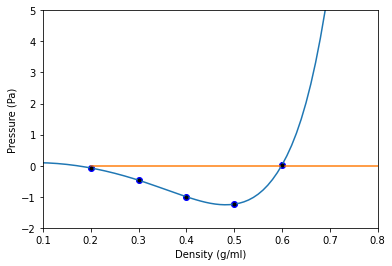

In [7]:
p_fit_arr = p_fit(p_v[:,0],rho)
plt.plot(rho,p_v[:,0],'bo')
plt.errorbar(rho,p_v[:,0],yerr=p_v[:,1],fmt='.k')
plt.plot([i*0.01 for i in range(1,150)],p_fit_arr[1:])
plt.plot(rho,np.zeros((10,)))
plt.xlim(0.1,0.8)
plt.ylim(-2,5)
plt.xlabel('Density (g/ml)')
plt.ylabel('Pressure (Pa)')
plt.show()